# TASK 4 : Handwritten digit recognition

## AIM : Predict handwritten digits with MNIST image dataset

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Training Data

In [2]:
df=pd.read_csv('./mnist/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data and target values

In [4]:
xtrain=df.iloc[:,1:]
ytrain=df[['label']]

In [5]:
xtrain.shape

(42000, 784)

### Converting Dataframe into numpy array

In [6]:
xtrain=xtrain.values
ytrain=ytrain.values

### Printing digits

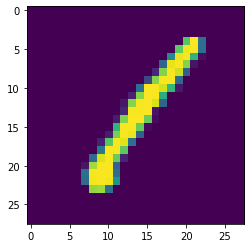

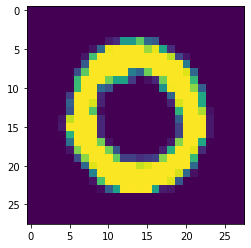

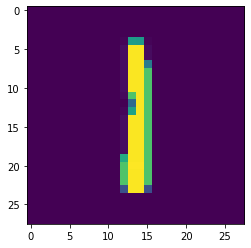

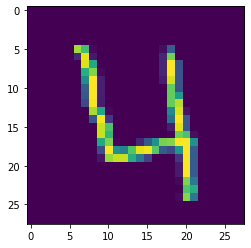

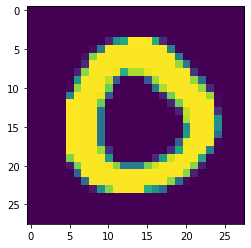

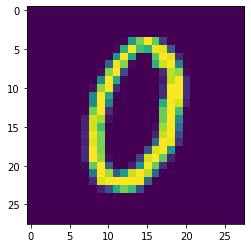

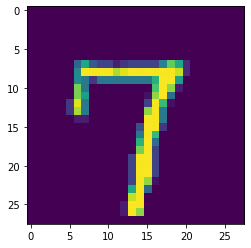

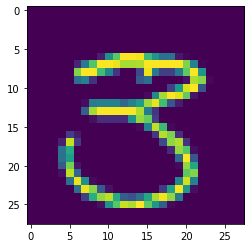

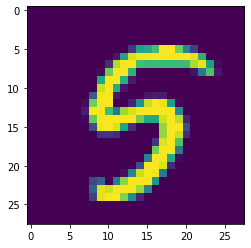

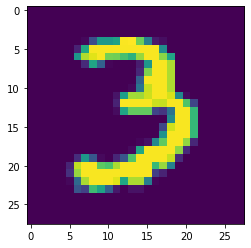

In [7]:
for i in range(10):
    plt.imshow(xtrain.reshape(xtrain.shape[0],28,28)[i])
    plt.show()

### Loading Test Data

In [8]:
xtest=pd.read_csv('./mnist/test.csv')

In [9]:
xtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Converting Dataframe into numpy array

In [10]:
xtest=xtest.values

### Building ML Model

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [12]:
ytrain=ytrain.reshape(-1)

In [13]:
ytrain.shape

(42000,)

### Cross Validation

In [14]:
cross_val_score(DecisionTreeClassifier(),xtrain,ytrain,scoring='accuracy',cv=5).mean()

0.854642857142857

In [15]:
cross_val_score(LogisticRegression(),xtrain,ytrain,scoring='accuracy',cv=5).mean()

C:\Users\ISHAN GOEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ISHAN GOEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9158095238095237

In [16]:
cross_val_score(RandomForestClassifier(),xtrain,ytrain,scoring='accuracy',cv=5).mean()

0.9639761904761904

In [17]:
cross_val_score(SVC(),xtrain,ytrain,scoring='accuracy',cv=5).mean()

0.9755238095238095

### SVC has highest accuracy, so we will use SVC to train our model

In [18]:
model=SVC()

In [19]:
model.fit(xtrain,ytrain)

SVC()

In [20]:
ypred=model.predict(xtest)

### Predicting final result

In [21]:
ypred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)